In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#change the current work dir
os.chdir(os.getcwd())

In [3]:
from recommenders.collaborativebasedfiltering import UserBasedCFRecommender, ItemBasedCFRecommender
from recommenders.contentbasedfiltering import CBFRecommender
from recommenders.hybrid import HybridRecommender
from recommenders.mf_ials import ALSMFRecommender
from recommenders.sslimrmse import SSLIMRMSERecommender
from recommenders.svd import SVDRecommender
from recommenders.test import RandomRecommender, TopPopRecommender
from recommenders.recommender import Recommender
from recommenders.slimbpr import SLIM_BPR_Cython
from recommenders.lightfm import LightFMRecommender
from recommenders.p3alpha import P3alphaRecommender
from utils import *

C:\Users\Luca\miniconda3\envs\RecSys\lib\site-packages\lightfm\_lightfm_fast.py:10: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  "LightFM was compiled without OpenMP support. "


In [4]:
df = optimize_parameters.load_df("HybridRecommenderWithTopK_kcross_long_normalize")
df

,IBCFweight,UBCFweight,CBFweight,SSLIMweight,ALSweight,LFMCFweight,SLIMBPRweight,SVDweight,P3weight,normalize,MAP
0,0.500611,0.127813,3.895750,0.298398,2.780032,0.0,2.297070,3.325959,4.474174,False,-0.070264
1,0.814329,3.264217,0.935707,1.872489,0.246856,0.0,0.724024,0.228521,0.023251,False,-0.065794
2,1.964922,2.349570,2.851370,0.421211,2.414860,0.0,4.623975,1.537420,3.420471,False,-0.068005
3,2.711427,1.924730,3.327947,0.201765,0.327538,0.0,1.402638,2.929598,4.519593,False,-0.066307
4,0.699225,0.098165,4.976451,0.943766,3.243040,0.0,2.001531,4.134333,0.973705,False,-0.073567
5,0.476756,1.374016,2.787176,0.397181,3.253340,0.0,0.197511,1.463794,3.777108,False,-0.070639
6,2.373994,1.737310,0.771952,3.378779,2.159295,0.0,3.615964,2.984645,3.808616,False,-0.065213
7,4.969525,4.555197,2.507757,2.480550,4.670944,0.0,1.497354,4.089010,4.642631,False,-0.065863
8,3.750374,2.764504,3.981802,2.009414,3.789332,0.0,1.243392,3.507619,2.091567,False,-0.067349
9,0.940496,2.429138,3.787777,4.429991,0.808331,0.0,4.151732,0.842898,4.961917,False,-0.068731


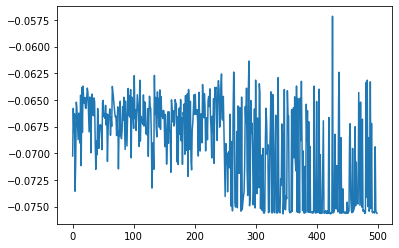

In [5]:
plt.plot(df["MAP"])

In [6]:
df.loc[df['MAP'].idxmin()]

IBCFweight        0.117106
UBCFweight          1.0163
CBFweight          4.98106
SSLIMweight        4.18237
ALSweight          2.26666
LFMCFweight              0
SLIMBPRweight       4.3427
SVDweight          2.70309
P3weight          0.669353
normalize            False
MAP             -0.0756948
Name: 423, dtype: object